![Alt img](car_pred.jpg)

Linear Regression RMSE: 1.8658375680942472


Random Forest RMSE: 0.9090348439641811
Gradient Boosting RMSE: 0.92457051900878
Support Vector Regression RMSE: 2.306662242267134


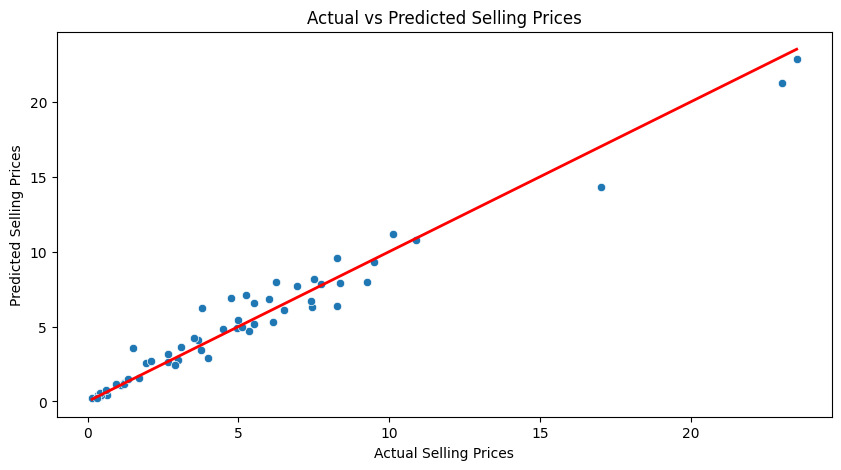

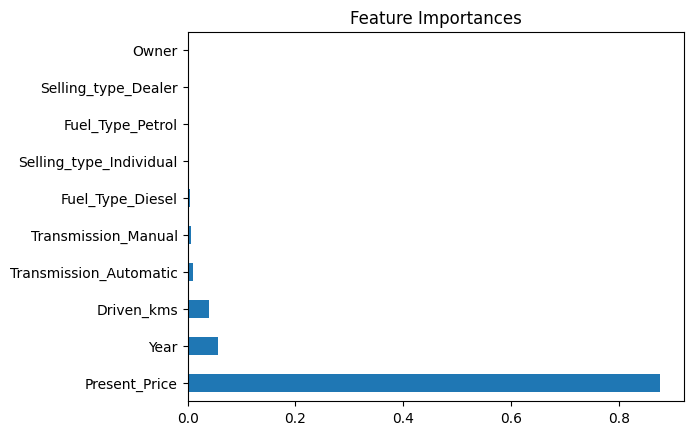

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('car_data.csv')

# Preprocessing
data = data.drop('Car_Name', axis=1)
data = pd.get_dummies(data, columns=['Fuel_Type', 'Selling_type', 'Transmission'])
X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features (some models like SVR require feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize multiple regression models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    print(f"{name} RMSE: {rmse}")

# Visualization of actual vs. predicted selling prices for one model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred)  # Corrected line
plt.xlabel('Actual Selling Prices')
plt.ylabel('Predicted Selling Prices')
plt.title('Actual vs Predicted Selling Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Corrected line
plt.show()

# Feature importances from Random Forest
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances')
plt.show()
